In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data
np.random.seed(0)
centers = [[-5, 0], [5, 1.5]]

X, y = make_blobs(n_samples=2000, centers=centers, random_state=5)
transformation = [[0.5, 0.5], [-0.5, 1.5]]
X = np.dot(X, transformation)

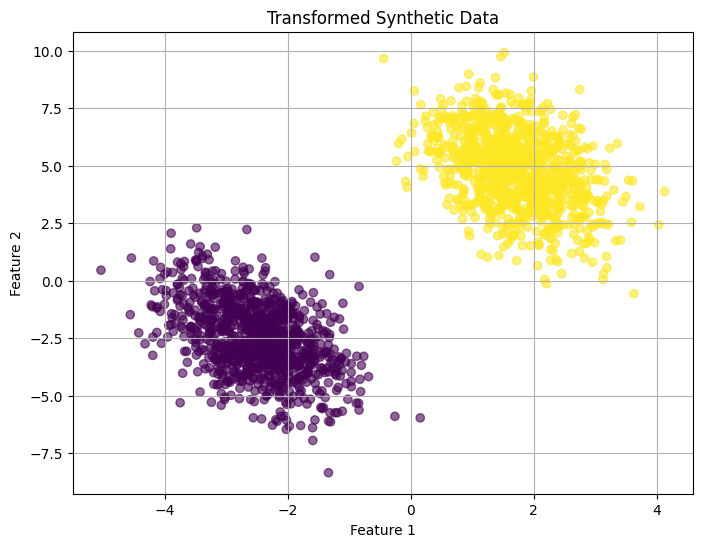

In [98]:
# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.title("Transformed Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

In [99]:
# Add a column of ones to X for the bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])
# Ensure binary labels
y = (y == 1).astype(int)  

In [100]:
# Sigmoid function to avoid overflow
def sigmoid(z):
    # Clip z to avoid overflow in exp
    z = np.clip(z, -250, 250)
    return 1 / (1 + np.exp(-z))


# Compute the logistic loss (cross-entropy)
def logistic_loss(X, y, w):
    z = X.dot(w)
    p = sigmoid(z)
    # Avoid log(0) by clipping predictions
    p = np.clip(p, 1e-15, 1 - 1e-15)
    loss = -np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))
    return loss


# Compute the gradient of the logistic loss
def gradient(X, y, w):
    z = X.dot(w)
    predictions = sigmoid(z)
    return X.T.dot(predictions - y) / len(y)

In [101]:
# Initialize weights
w_gd = np.zeros(X.shape[1])

# Learning rate and iterations
learning_rate = 0.1
n_iterations = 20
losses_gd = []

In [102]:
# Gradient Descent Loop
for i in range(n_iterations):
    grad = gradient(X, y, w_gd)
    w_gd = w_gd - learning_rate * grad
    current_loss = logistic_loss(X, y, w_gd)
    losses_gd.append(current_loss)
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {current_loss:.4f}")

print(f"Final GD Loss: {losses_gd[-1]:.4f}")

Iteration 0, Loss: 0.3553
Iteration 5, Loss: 0.1182
Iteration 10, Loss: 0.0753
Iteration 15, Loss: 0.0563
Final GD Loss: 0.0471


In [103]:
# Hessian of the logistic loss
def hessian(X, w):
    z = X.dot(w)
    p = sigmoid(z)
    w_diag = p * (1 - p)
    # Create diagonal matrix
    W = np.diag(w_diag)
    hess = X.T @ W @ X / len(y)
    return hess

In [106]:
# Initialize weights for Newton's Method
w_newton = np.zeros(X.shape[1])

n_iterations = 20
losses_newton = []

for i in range(n_iterations):
    grad = gradient(X, y, w_newton)
    hess = hessian(X, w_newton)

    # Regularize Hessian to ensure invertibility
    # Add small identity matrix to diagonal
    hess_reg = hess + 1e-8 * np.eye(hess.shape[0])

    # Solve H * delta = grad
    delta = np.linalg.solve(hess_reg, grad)
    w_newton = w_newton - delta

    current_loss = logistic_loss(X, y, w_newton)
    losses_newton.append(current_loss)
    if i % 5 == 0:
        print(f"Iteration {i}, Loss: {current_loss:.6f}")

print(f"Final Newton's Method Loss: {losses_newton[-1]:.10f}")

Iteration 0, Loss: 0.145219
Iteration 5, Loss: 0.001300
Iteration 10, Loss: 0.000017
Iteration 15, Loss: 0.000000
Final Newton's Method Loss: 0.0000000061


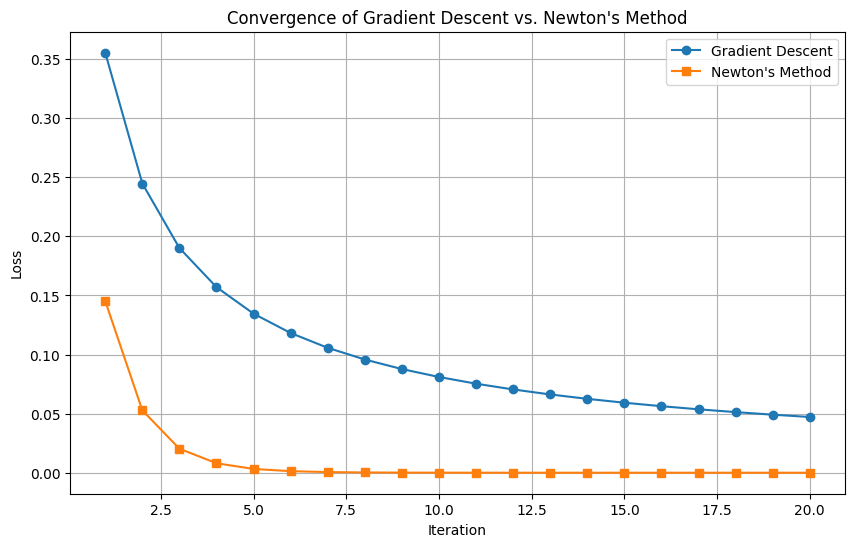

In [105]:
# Plot the losses
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses_gd,
         label='Gradient Descent', marker='o')
plt.plot(range(1, n_iterations + 1), losses_newton,
         label="Newton's Method", marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Convergence of Gradient Descent vs. Newton\'s Method')
plt.legend()
plt.grid(True)
plt.show()

In [107]:
# Analyze convergence with new centers
np.random.seed(0)
new_centers = [[2, 2], [5, 1.5]]  # Updated centers
X_new, y_new = make_blobs(n_samples=2000, centers=new_centers, random_state=5)
X_new = np.dot(X_new, transformation)
# X_new = np.hstack([np.ones((X_new.shape[0], 1)), X_new])
y_new = (y_new == 1).astype(int)

# Re-initialize weights
w_gd_new = np.zeros(X_new.shape[1])
losses_gd_new = []

# Run GD with same parameters
for i in range(n_iterations):
    grad = gradient(X_new, y_new, w_gd_new)
    w_gd_new = w_gd_new - learning_rate * grad
    current_loss = logistic_loss(X_new, y_new, w_gd_new)
    losses_gd_new.append(current_loss)

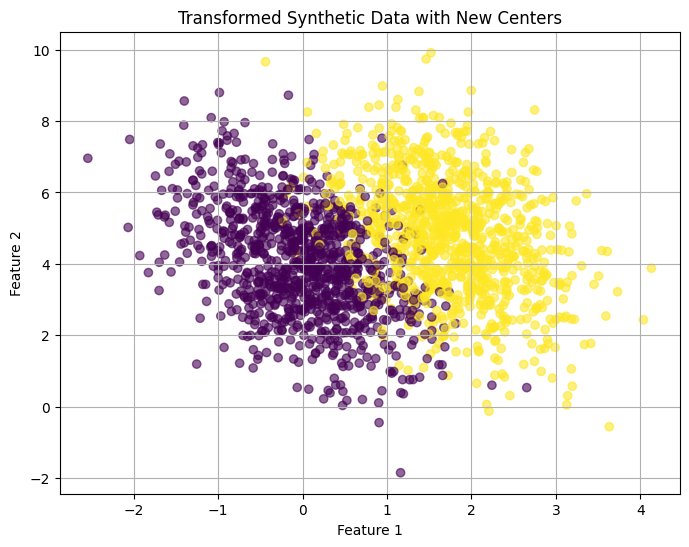

In [109]:
# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_new[:, 0], X_new[:, 1], c=y_new, cmap='viridis', alpha=0.6)
plt.title("Transformed Synthetic Data with New Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()

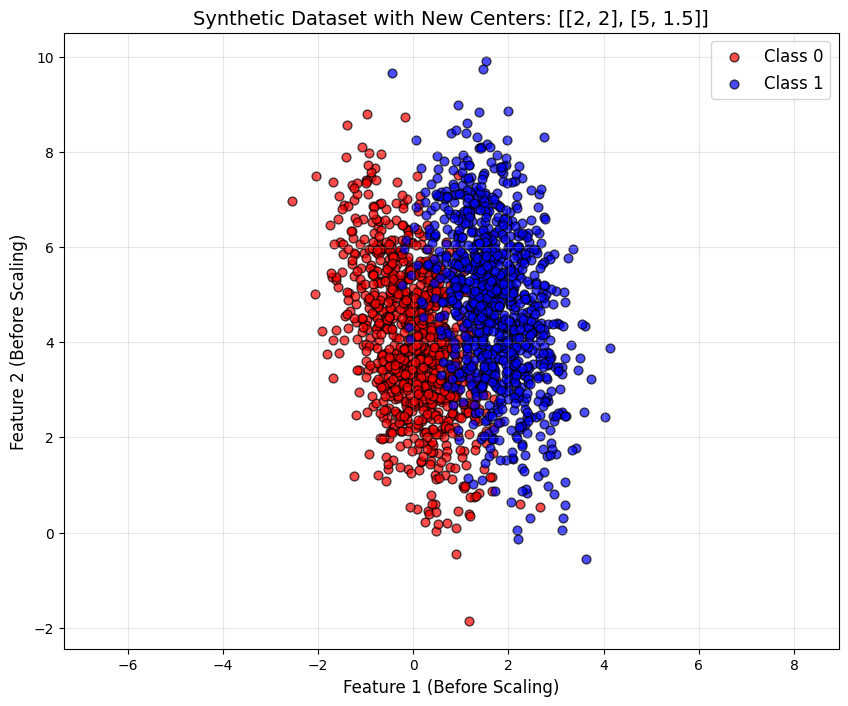

In [54]:
plt.figure(figsize=(10, 8))
plt.scatter(X_new[y_new == 0, 0], X_new[y_new == 0, 1],
            color='red', label='Class 0', alpha=0.7, edgecolors='k', s=40)
plt.scatter(X_new[y_new == 1, 0], X_new[y_new == 1, 1],
            color='blue', label='Class 1', alpha=0.7, edgecolors='k', s=40)

plt.title(
    'Synthetic Dataset with New Centers: [[2, 2], [5, 1.5]]', fontsize=14)
plt.xlabel('Feature 1 (Before Scaling)', fontsize=12)
plt.ylabel('Feature 2 (Before Scaling)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

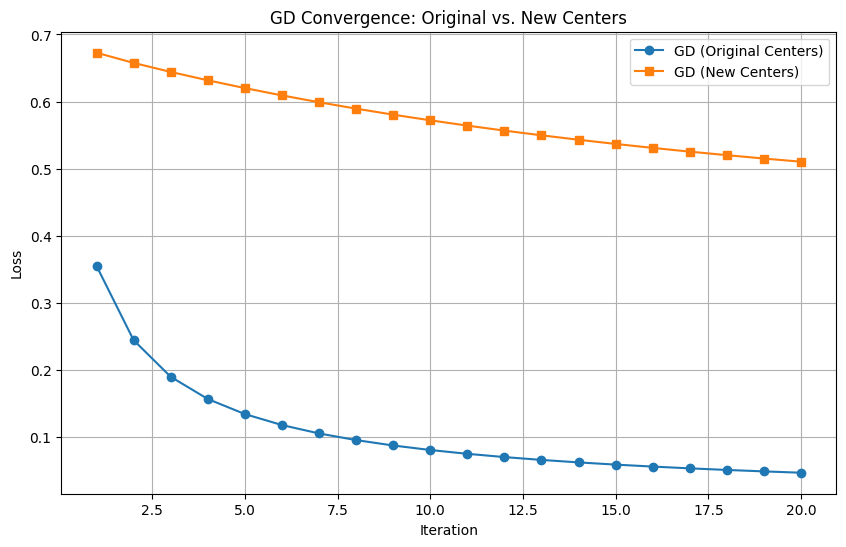

In [110]:
# Plot comparison
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_iterations + 1), losses_gd,
         label='GD (Original Centers)', marker='o')
plt.plot(range(1, n_iterations + 1), losses_gd_new,
         label='GD (New Centers)', marker='s')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('GD Convergence: Original vs. New Centers')
plt.legend()
plt.grid(True)
plt.show()

In [20]:
print("Final Loss (Original):", losses_gd[-1])
print("Final Loss (New):", losses_gd_new[-1])

Final Loss (Original): 0.04713105459261193
Final Loss (New): 0.5039763359946723
